import requests
response=requests.get("https://www.naukri.com/skilllabs-overview-3442166?tab=jobs&searchId=17112769340583111&src=orgCompanyListing")
print(response.content)


#find following values and store it in datafram using beautifulsoup
#using same link write code for scrapy
#job title, company name, experience rquired, salary, location

In [ ]:
#data scraping not happening
from bs4 import BeautifulSoup
import time
import requests
import re

In [ ]:
def fetchAndSaveToFile(url, path):
  response=requests.get(url)
  with open(path, "w") as f:
    f.write(response.text)

url = "https://www.naukri.com/skilllabs-overview-3442166?tab=jobs&searchId=17112769340583111&src=orgCompanyListing"

fetchAndSaveToFile(url, "/content/naukri.html")

In [ ]:
with open("naukri.html", "r") as f:
  html_doc = f.read()

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width,initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
  <link href="//static.naukimg.com" rel="dns-prefetch preconnect"/>
  <link href="//img.naukimg.com" rel="dns-prefetch preconnect"/>
  <link href="//logs.naukri.com" rel="dns-prefetch preconnect"/>
  <link href="//lg.naukri.com" rel="dns-prefetch preconnect"/>
  <link href="https://www.googletagmanager.com" rel="dns-prefetch">
   <base href="//www.naukri.com"/>
   <link href="//www.naukri.com/favicon.ico" rel="icon" type="image/x-icon"/>
   <link href="./manifest.json" rel="manifest"/>
   <link as="style" href="//static.naukimg.com/s/7/109/c/main.adb2a130.min.css" rel="preload">
    <link as="script" crossorigin="anonymous" href="//static.naukimg.com/s/7/109/j/main.65bc47af.min.js" rel="preload"/>
    <link as="script" href="https://static.naukimg.com/s/7/0/j/wid
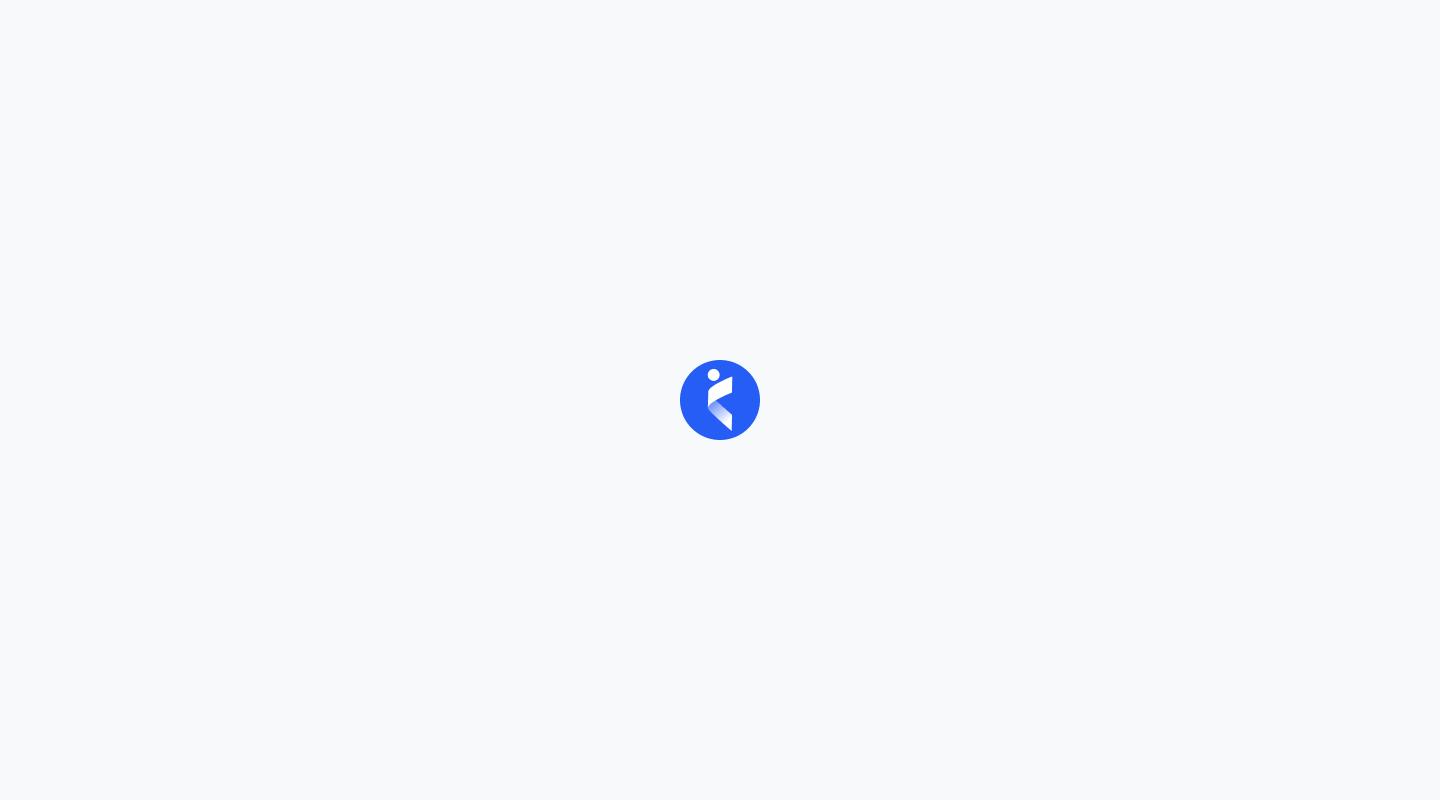

In [ ]:
html_soup = BeautifulSoup(html_doc, 'html.parser')
type(html_soup)
print(html_soup.prettify())

In [ ]:
tag = html_soup.find_all("div", {"class" : "container-fluid"})
print(tag)

[<div class="container-fluid" id="splScrn" style="display: inherit;"></div>]


In [ ]:
for link in html_soup.find_all("a"):
  print(link)

In [ ]:
val=html_soup.find("a",{"data-test":"tupleTitle"})
print(val)

None


Using Scrapy

In [ ]:
# !pip install scrapy
import scrapy
from scrapy.http import Response
# !pip install twisted==22.10.0


In [ ]:
class NaukriSpider(scrapy.Spider):
  name = "naukri"
  allowed_domains = [url]

def start_requests(self):
  url = "https://www.naukri.com/skilllabs-overview-3442166?tab=jobs&searchId=17112769340583111&src=orgCompanyListing"
  req = scrapy.Request(url = url, callback = self.parse)
  yield req

def parse(self, response):
  page = response.url.split("/")

In [ ]:
import scrapy
import pandas as pd

class JobSpider(scrapy.Spider):
    name = 'jobs'
    start_urls = ['https://www.naukri.com/skilllabs-overview-3442166?tab=jobs&searchId=17112769340583111&src=orgCompanyListing']

    def parse(self, response):
        for job in response.css('article.jobTuple'):
            yield {
                'Job Title': job.css('a.title::text').get(),
                'Company Name': job.css('a.subTitle::text').get(),
                'Experience Required': job.css('li.experience::text').get(),
                'Salary': job.css('li.salary::text').get(),
                'Location': job.css('li.location::text').get()
            }

# Run the spider
if __name__ == "__main__":
    from scrapy.crawler import CrawlerProcess

    # Set up the crawler process
    process = CrawlerProcess(settings={
        'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    })

    # Add the spider to the process
    process.crawl(JobSpider)

    # Start the process
    process.start()


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.naukri.com/skilllabs-overview-3442166?tab=jobs&searchId=17112769340583111&src=orgCompanyListing"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

job_title = []
company_name = []
experience_required = []
salary = []
location = []

for div in soup.find_all('div', {'class': 'jobsearch-SerpJobCard'}):
    try:
        title = div.find('a', {'class': 'title fwBold'}).text.strip()
        job_title.append(title)
    except AttributeError:
        job_title.append(None)

    try:
        company = div.find('a', {'class': 'subTitle'}).text.strip()
        company_name.append(company)
    except AttributeError:
        company_name.append(None)

    try:
        exp = div.find('span', {'class': 'exp'}).text.strip()
        experience_required.append(exp)
    except AttributeError:
        experience_required.append(None)

    try:
        salary_tag = div.find('span', {'class': 'green'})
        salary_text = salary_tag.text.strip()
        salary.append(salary_text)
    except AttributeError:
        salary.append(None)

    try:
        loc = div.find('div', {'class': 'recCity'}).text.strip()
        location.append(loc)
    except AttributeError:
        location.append(None)

df = pd.DataFrame({'Job Title': job_title, 'Company Name': company_name, 'Experience Required': experience_required, 'Salary': salary, 'Location': location})
print(df)


Empty DataFrame
Columns: [Job Title, Company Name, Experience Required, Salary, Location]
Index: []


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Send a GET request to the URL
response = requests.get("https://www.naukri.com/skilllabs-overview-3442166?tab=jobs&searchId=17112769340583111&src=orgCompanyListing")

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find all job listings
job_listings = soup.find_all('article', class_='jobTuple')

# Initialize lists to store data
job_titles = []
company_names = []
experience_required = []
salaries = []
locations = []

# Extract information from each job listing
for job in job_listings:
    # Job Title
    title = job.find('a', class_='title')
    job_titles.append(title.text.strip() if title else 'N/A')

    # Company Name
    company = job.find('a', class_='subTitle')
    company_names.append(company.text.strip() if company else 'N/A')

    # Experience Required
    exp = job.find('li', class_='experience')
    experience_required.append(exp.text.strip() if exp else 'N/A')

    # Salary
    salary = job.find('li', class_='salary')
    salaries.append(salary.text.strip() if salary else 'N/A')

    # Location
    loc = job.find('li', class_='location')
    locations.append(loc.text.strip() if loc else 'N/A')

# Create DataFrame
data = {
    'Job Title': job_titles,
    'Company Name': company_names,
    'Experience Required': experience_required,
    'Salary': salaries,
    'Location': locations
}

df = pd.DataFrame(data)

# Display DataFrame
print(df)


Empty DataFrame
Columns: [Job Title, Company Name, Experience Required, Salary, Location]
Index: []


In [ ]:
import scrapy

class NaukriSpider(scrapy.Spider):
    name = 'naukri'
    start_urls = ['https://www.naukri.com/skilllabs-overview-3442166?tab=jobs&searchId=17112769340583111&src=orgCompanyListing']

    def parse(self, response):
        for job in response.css('article.jobTuple'):
            yield {
                'Job Title': job.css('a.title::text').get(),
                'Company Name': job.css('a.subTitle::text').get(),
                'Experience Required': job.css('li.experience::text').get(),
                'Salary': job.css('li.salary::text').get(),
                'Location': job.css('li.location::text').get()
            }
